# Computing the overlaps

In [13]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers



In [14]:
net_specs =  ["CWARNN", "SL", "1Par", "MADE_21", "MADE_22", "CWARNN_inf"]    
nets = {}
for net_spec in net_specs:
    nome_file = f"N200_seed0_modelCW_net_spec{net_spec}_J1.0_h0.0_lr0.001_max_step1000_batch_size2000_std_fe_limit0.0001_beta1.20"
    "N200_seed0_modelCW_net_specCWARNN_inf_J1.0_h0.0_lr0.001_max_step1000_batch_size2000_std_fe_limit0.0001_beta1.30"
    nets[net_spec] = torch.load(f"./data/nets/{nome_file}.pt")


In [15]:
x, h = nets["MADE_22"].sample(20000)

CWARNN
SL
1Par
MADE_21
MADE_22
CWARNN_inf


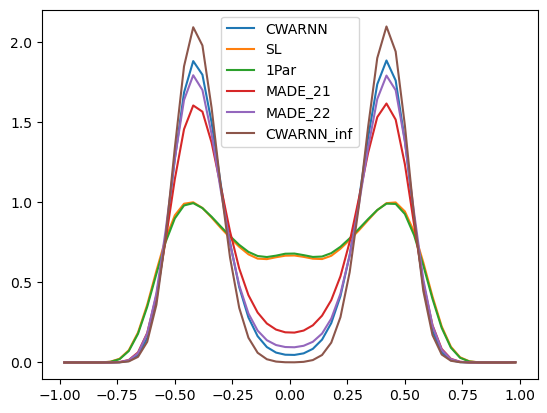

In [31]:
import matplotlib.pyplot as plt
overlaps = {}
for net_spec in net_specs:
    print(net_spec)
    x, h = nets[net_spec].sample(20000)
    values, bins = np.histogram((x@x.T).flatten().cpu().numpy()/200, bins=50, density=True, range = ([-1, 1]))
    overlaps[net_spec] = values
    overlaps["bins"] = bins
    plt.plot((bins[1:] + bins[0:-1])/2, values, label=net_spec)
plt.legend()
plt.show()

In [33]:
overlaps["bins"] = (bins[1:] + bins[0:-1])/2
df_ov = pd.DataFrame(overlaps)
df_ov.to_csv("./data/overlaps.zip")